# **Projet IAD - SMA ( K-Medoids )**

## **Clustering K-Medoids :**

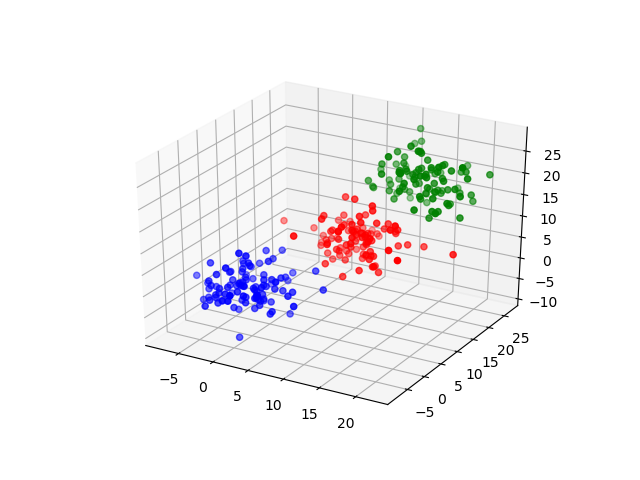

* L'algorithme K-Medoids (également appelé Partitioning Around Medoid) a été proposé en 1987 par Kaufman et Rousseeuw. Un médoïde peut être défini comme le point du cluster, dont les dissemblances avec tous les autres points du cluster sont minimales.

* La dissemblance de medoid(Ci) et object(Pi) est calculée en utilisantE = |Pi - Ci|

* Le coût dans l'algorithme K-Medoids est donné comme : 

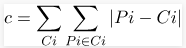

**Algorithme:**
1. Initialiser : sélectionnez k points aléatoires parmi les n points de données comme médoïdes.
2. Associez chaque point de données au médoïde le plus proche en utilisant n'importe quelle méthode métrique de distance commune.
3. Pendant que le coût diminue :
        Pour chaque médoïde m, pour chaque point de donnée o qui n'est pas un médoïde :
                1. Permuter m et o, associer chaque point de donnée au médoïde le plus proche, recalculer le coût.
                2. Si le coût total est supérieur à celui de l'étape précédente, annulez l'échange.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('breast-cancer-wisconsin.data')

In [ ]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


## **rename our columns first :** 

In [ ]:
pd.DataFrame(df.columns).T

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1


In [ ]:
dummy = pd.DataFrame(df.columns).T
for col in dummy.columns:
    dummy[col]=dummy[col].astype(float)
    dummy[col]=dummy[col].astype(int)

df.columns=range(0,df.shape[1])
df[6] = df[6].str.extract('(\d+)').astype(float)
for col in df.columns:
    df[col]=df[col].astype(float)
df = pd.concat([dummy, df],axis=0)
df.reset_index(inplace=True, drop=True)

In [ ]:
column_names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromati', 
                'Normal Nucleoli', 'Mitoses', 'Class']

df.columns=column_names
df['Class'] = df['Class'].replace(to_replace={2:1, 4:0})

## **EDA** :

In [ ]:
df.head(15)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromati,Normal Nucleoli,Mitoses,Class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0
5,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,0.0
6,1018099.0,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,1.0
7,1018561.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0
8,1033078.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0
9,1033078.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
df.tail(15)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromati,Normal Nucleoli,Mitoses,Class
684,466906.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
685,534555.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
686,536708.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
687,566346.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0
688,603148.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
689,654546.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,8.0,1.0
690,654546.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0
691,695091.0,5.0,10.0,10.0,5.0,4.0,5.0,4.0,4.0,1.0,0.0
692,714039.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
693,763235.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0


In [ ]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromati,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,0.655222
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    float64
 1   Clump Thickness              699 non-null    float64
 2   Uniformity of Cell Size      699 non-null    float64
 3   Uniformity of Cell Shape     699 non-null    float64
 4   Marginal Adhesion            699 non-null    float64
 5   Single Epithelial Cell Size  699 non-null    float64
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromati               699 non-null    float64
 8   Normal Nucleoli              699 non-null    float64
 9   Mitoses                      699 non-null    float64
 10  Class                        699 non-null    float64
dtypes: float64(11)
memory usage: 60.2 KB


In [ ]:
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromati                  0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
df.shape

(699, 11)

## **dropping the NaN values :**

In [ ]:
df = df.dropna(axis=0)
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromati                 0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
df.shape

(683, 11)

In [ ]:
df.iloc[:,:-1]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromati,Normal Nucleoli,Mitoses
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
695,841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
696,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
697,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


In [ ]:
df.iloc[:,-1]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
694    1.0
695    1.0
696    0.0
697    0.0
698    0.0
Name: Class, Length: 683, dtype: float64

**let's verify NaN values :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           683 non-null    float64
 1   Clump Thickness              683 non-null    float64
 2   Uniformity of Cell Size      683 non-null    float64
 3   Uniformity of Cell Shape     683 non-null    float64
 4   Marginal Adhesion            683 non-null    float64
 5   Single Epithelial Cell Size  683 non-null    float64
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromati               683 non-null    float64
 8   Normal Nucleoli              683 non-null    float64
 9   Mitoses                      683 non-null    float64
 10  Class                        683 non-null    float64
dtypes: float64(11)
memory usage: 64.0 KB


In [ ]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromati                 0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

**Split data to train / test data sets :**

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

**Scalling our values to help our model on training :**

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
!pip install scikit-learn-extra

## **Building our K-medois Model :**

In [ ]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X_train)

In [ ]:
y_pred = kmedoids.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.96        82
         1.0       0.95      1.00      0.98       144

    accuracy                           0.97       226
   macro avg       0.98      0.96      0.97       226
weighted avg       0.97      0.97      0.97       226

[[ 75   7]
 [  0 144]]


In [ ]:
from sklearn import metrics 
from sklearn.metrics import precision_recall_fscore_support
acc=(metrics.accuracy_score(y_test, y_pred)*100)
print(acc)    

from sklearn.metrics import precision_score
pre=(precision_score(y_test, y_pred)*100)
print(pre)

from sklearn.metrics import recall_score
# recall_score = (Vrai Positif) divisé par l'ensemble des positifs (Vrai Positif + Faux Négatif)
rec=(recall_score(y_test, y_pred)*100)
print(rec)

from sklearn.metrics import f1_score
f1=(f1_score(y_test, y_pred)*100)
print(f1)

96.90265486725663
95.36423841059603
100.0
97.6271186440678
